In [1]:
%matplotlib inline

In [2]:
import os, sys
THIS_DIR = os.path.abspath(os.getcwd())
sys.path.append(os.path.join(THIS_DIR, ".."))

import fcm
import fcm.atmosphere as atm

from enum import Enum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def plot_observation(observation):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    for i, (label, series) in enumerate(observation.items()):
        ax.plot(series.to_numpy(), series.index.to_numpy(), '-' if i == 0 else '--', label=label)

    ax.set_xlabel("dEdz [kt TNT / km]")
    ax.set_ylabel("altitude [km]")
    ax.set_xscale('log')
    ax.legend(loc='best')
    
    return fig

In [4]:
def plot_simulation(dEdz, observation):
    mask = np.logical_and(dEdz.index.to_numpy() >= observation.index.min(),
                          dEdz.index.to_numpy() <= observation.index.max())
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    plt.plot(dEdz.to_numpy()[mask], dEdz.index.to_numpy()[mask], label='fcm')
    plt.plot(observation['min. dEdz [kt TNT / km]'].to_numpy(), observation.index.to_numpy(),
             "--", label='observation (min)')
    plt.plot(observation['max. dEdz [kt TNT / km]'].to_numpy(), observation.index.to_numpy(),
             "--", label='observation (max)')
    
    plt.xlabel("dEdz [kt TNT / km]")
    plt.ylabel("altitude [km]")
    plt.xscale('log')
    plt.legend(loc='best')
    
    return fig

In [5]:
import wheeler_meteoroids

## Load Atmosphere

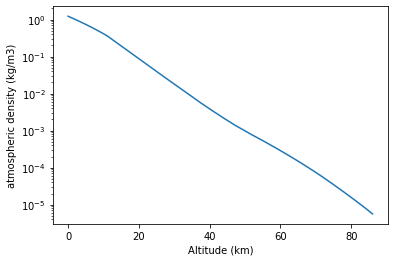

In [6]:
atmosphere = atm.US_standard_atmosphere()
atmosphere.plot()
plt.yscale('log')
plt.ylabel('atmospheric density (kg/m3)');

## Kosice Meteoroid

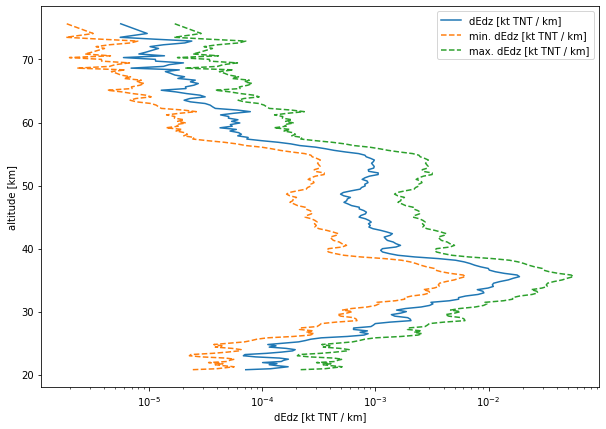

In [7]:
event = wheeler_meteoroids.Event.kosice
observation = wheeler_meteoroids.read_data(event)
fig_kosice_obs = plot_observation(observation)

In [8]:
impactor, sim = event(atmosphere, 1e-2)
impactor.groups_table()

AttributeError: module 'fcm' has no attribute 'FragmentCloudModel'

In [9]:
sim.simulate_impact(impactor, 100, craters=False, dedz=True, final_states=True)

Runtime C++ method (17427 fragments) = 4.32E+00 seconds


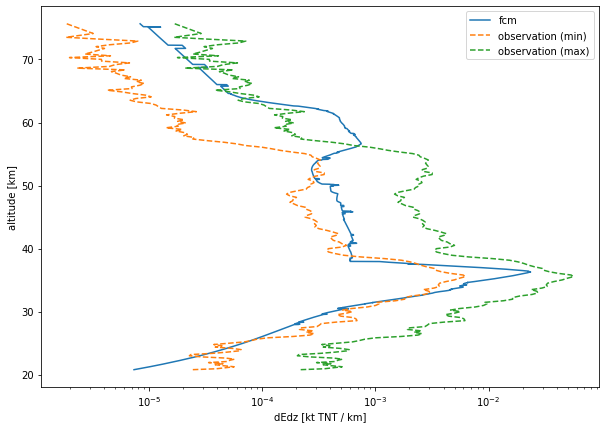

In [10]:
fig_kosice_sim = plot_simulation(sim.results.energy_deposition, observation)

## Tagish Lake Meteoroid

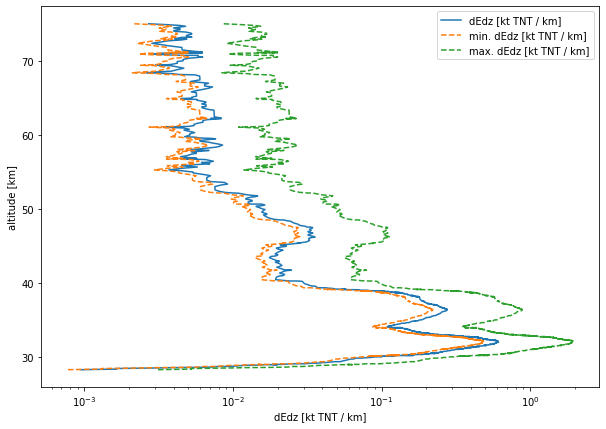

In [11]:
event = wheeler_meteoroids.Event.tagish_lake
observation = wheeler_meteoroids.read_data(event)
fig_tagish_lake_obs = plot_observation(observation)

In [12]:
impactor, sim = event(atmosphere, 1e-2)
impactor.groups_table()

,mass_fraction,density,pieces,strength,cloud_mass_frac,strength_scaler,fragment_mass_fractions,Component masses (kg),Group mass (kg)
Group ID,,,,,,,,,
0,1.00,1640.0,10,1.0,20.0,0.10,"(0.5, 0.5)",78.249219,782.492190
1,0.50,1640.0,5,1.8,20.0,0.10,"(0.5, 0.5)",78.249219,391.246095
2,0.80,1640.0,5,3.8,20.0,0.15,"(0.5, 0.5)",125.198750,625.993752
3,1.20,1640.0,2,6.0,20.0,0.20,"(0.5, 0.5)",469.495314,938.990628
4,1.00,1640.0,1,15.0,20.0,0.20,"(0.5, 0.5)",782.492190,782.492190
5,0.75,1640.0,1,40.0,60.0,0.40,"(0.5, 0.5)",586.869143,586.869143
6,1.00,1640.0,1,90.0,60.0,0.10,"(0.5, 0.5)",782.492190,782.492190
7,4.60,1640.0,1,140.0,80.0,0.30,"(0.5, 0.5)",3599.464075,3599.464075
8,2.80,1640.0,1,350.0,20.0,0.25,"(0.5, 0.5)",2190.978133,2190.978133


In [13]:
sim.simulate_impact(impactor, 100, craters=False, dedz=True, final_states=True)

Runtime C++ method (29860 fragments) = 2.60E+00 seconds


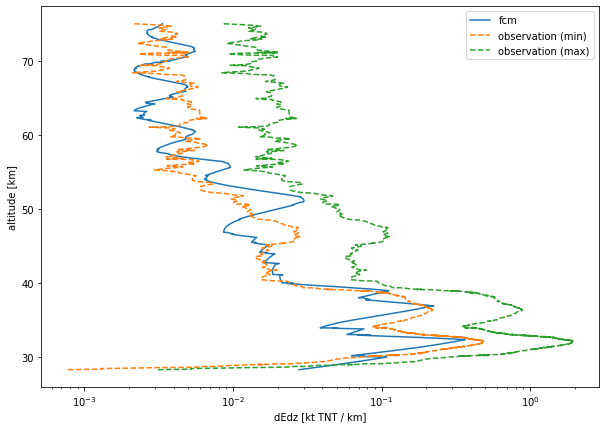

In [14]:
fig_tagish_lake_sim = plot_simulation(sim.results.energy_deposition, observation)

## Benesov meteoroid

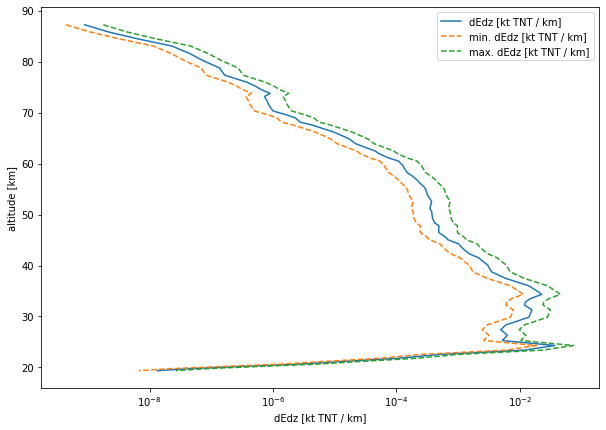

In [15]:
event = wheeler_meteoroids.Event.benesov
observation = wheeler_meteoroids.read_data(event)
fig_benesov_obs = plot_observation(observation)

In [16]:
impactor, sim = event(atmosphere, 1e-4)
impactor.groups_table()

,mass_fraction,density,pieces,strength,cloud_mass_frac,strength_scaler,fragment_mass_fractions,Component masses (kg),Group mass (kg)
Group ID,,,,,,,,,
0,0.10,3200.0,1,25.0,50.0,0.4,"(0.8, 0.2)",4.104103,4.104103
1,0.10,3200.0,1,55.0,50.0,0.3,"(0.8, 0.2)",4.104103,4.104103
2,0.10,3200.0,1,80.0,50.0,0.3,"(0.8, 0.2)",4.104103,4.104103
3,0.10,3200.0,1,100.0,50.0,0.3,"(0.8, 0.2)",4.104103,4.104103
4,0.15,3200.0,1,150.0,50.0,0.3,"(0.8, 0.2)",6.156155,6.156155
5,0.05,3200.0,1,250.0,50.0,0.3,"(0.8, 0.2)",2.052052,2.052052
6,0.20,3200.0,1,700.0,50.0,0.3,"(0.8, 0.2)",8.208206,8.208206
7,0.20,3200.0,1,900.0,50.0,0.2,"(0.8, 0.2)",8.208206,8.208206
8,1.00,3200.0,1,1100.0,50.0,0.2,"(0.8, 0.2)",41.041032,41.041032


In [17]:
sim.simulate_impact(impactor, 100, craters=False, dedz=True, final_states=True)

Runtime C++ method (535 fragments) = 7.34E-01 seconds


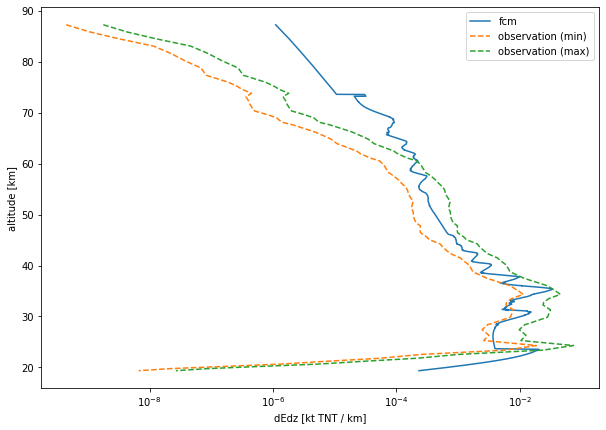

In [18]:
fig_benesov_sim = plot_simulation(sim.results.energy_deposition, observation)

## Chelyabinsk Meteoroid

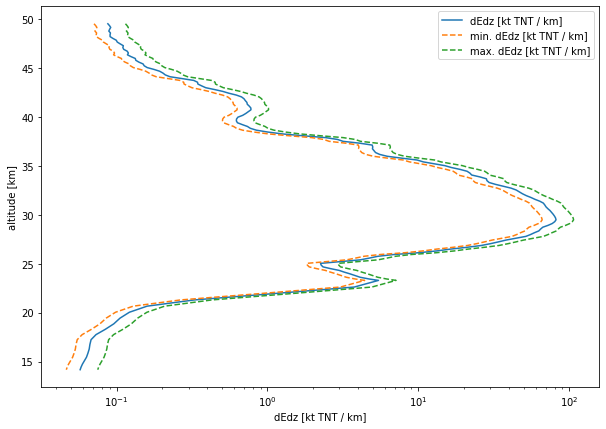

In [19]:
event = wheeler_meteoroids.Event.chelyabinsk
observation = wheeler_meteoroids.read_data(event)
fig_chelyabinsk_obs = plot_observation(observation)

In [20]:
impactor, sim = event(atmosphere, 1e-4)
impactor.groups_table()

,mass_fraction,density,pieces,strength,cloud_mass_frac,strength_scaler,fragment_mass_fractions,Component masses (kg),Group mass (kg)
Group ID,,,,,,,,,
0,0.25,3300.0,1,600.0,75.0,0.08,"(0.6, 0.4)",2.540237e+04,2.540237e+04
1,93.00,3300.0,1,1480.0,75.0,0.30,"(0.6, 0.4)",9.449681e+06,9.449681e+06
2,0.80,3300.0,8,1750.0,75.0,0.07,"(0.6, 0.4)",1.016095e+04,8.128758e+04
3,2.55,3300.0,10,2500.0,100.0,NaN,None,2.591042e+04,2.591042e+05
4,1.00,3300.0,6,3500.0,100.0,NaN,None,1.693491e+04,1.016095e+05
5,2.40,3300.0,2,15600.0,75.0,0.07,"(0.6, 0.4)",1.219314e+05,2.438627e+05


In [21]:
sim.simulate_impact(impactor, 100, craters=False, dedz=True, final_states=True)

Runtime C++ method (896 fragments) = 5.05E+00 seconds


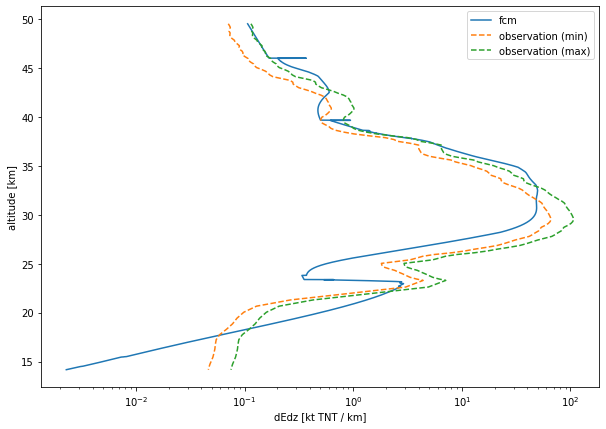

In [22]:
fig_chelyabinsk_sim = plot_simulation(sim.results.energy_deposition, observation)